In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 年终奖纳税

In [2]:
def bonus_tax(amount):
    '''年终奖一次性发放纳税
    输入：年终奖金额
    输出：[税,到手,税率]
    '''
    bonus_month = amount/12.0
    
    bound = [3000.0,12000.0,25000.0,35000.0,55000.0,80000.0,float('inf')]
    ratio = [0.03,0.1,0.2,0.25,0.3,0.35,0.45]
    sub = [0,210,1410,2660,4410,7160,15160]
    
    index = 0
    
    for i, b in enumerate(bound):
        if bonus_month - b < 0.001:
            index= i
            break
            
    tax = amount*ratio[index] - sub[index]
    return [tax, amount-tax, ratio[index]]

In [3]:
x = pd.Series(np.arange(1000,500000,500))
Y = x.apply(bonus_tax)

In [4]:
df = pd.DataFrame(list(Y), columns=['缴税额','到手','税率'])
df['年终奖'] = x
df = df.reindex(columns=['年终奖','税率','缴税额','到手'])
df.head()

,年终奖,税率,缴税额,到手
0,1000,0.03,30.0,970.0
1,1500,0.03,45.0,1455.0
2,2000,0.03,60.0,1940.0
3,2500,0.03,75.0,2425.0
4,3000,0.03,90.0,2910.0


## 2. 奖金黑洞
年终奖144001-160500之间存在奖金黑洞，160500和144000实际到手一样

In [5]:
df[df['年终奖'] == 144000]

,年终奖,税率,缴税额,到手
286,144000,0.1,14190.0,129810.0


In [6]:
df[df['年终奖'] == 160500]

,年终奖,税率,缴税额,到手
319,160500,0.2,30690.0,129810.0


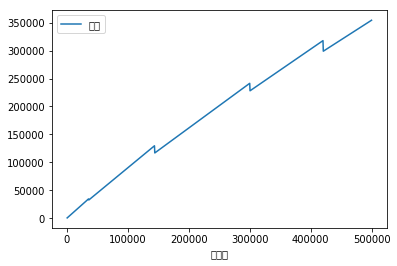

In [7]:
df.plot(x='年终奖',y='到手')

## 3. 每月工资纳税

In [8]:
def salary_for_tax(tax_base, deduction, bonus, month):
    '''
    输入：每月缴税基数 个税抵扣金额 年终奖 年终奖发放月份
    输出：年缴税基数
    '''
    tmp = [tax_base-deduction-5000]*12
    tmp[month-1] += bonus
    return tmp

In [9]:
salary_for_tax(19481.96, 1000, 0, 6)

[13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96,
 13481.96]

In [10]:
def tax(salary_year):
    tax_month = 0
    tax_cum = 0
    k = 0
    
    result = []
    
    for i in range(len(salary_year)):
        k += salary_year[i]
        if k <= 0:
            rate_tax = 0
            part_tax = 0
        elif 0 < k <= 36000:
            rate_tax = 0.03
            part_tax = 0
        elif 36000 < k <= 144000:
            rate_tax = 0.1
            part_tax = 2520
        elif 144000 < k <= 300000:
            rate_tax = 0.2
            part_tax = 16920
        elif 300000 < k <= 420000:
            rate_tax = 0.25
            part_tax = 31920
        elif 420000 < k <= 660000:
            rate_tax = 0.3
            part_tax = 52920
        elif 660000 < k <= 960000:
            rate_tax = 0.35
            part_tax = 85920
        elif k > 960000:
            rate_tax = 0.45
            part_tax = 181920

        tax_month = k * rate_tax - part_tax - tax_cum
        tax_cum += tax_month
        
        result.append([salary_year[i],k, rate_tax, tax_month, tax_cum])
        
    return pd.DataFrame(result, columns=['当月应缴税金额','累加应缴税金额','税率','当月税费','累计税费'])

## 4. 新工资税费计算公式验证
* 累计税费仅与当年总收入有关，与收入分布情况无关  
* 三种情况，累计税费一样

In [11]:
tax([100,100000,20000])

,当月应缴税金额,累加应缴税金额,税率,当月税费,累计税费
0,100,100,0.03,3.0,3.0
1,100000,100100,0.10,7487.0,7490.0
2,20000,120100,0.10,2000.0,9490.0


In [12]:
tax([0,120100,0])

,当月应缴税金额,累加应缴税金额,税率,当月税费,累计税费
0,0,0,0.0,0.0,0.0
1,120100,120100,0.1,9490.0,9490.0
2,0,120100,0.1,0.0,9490.0


In [13]:
tax([0,60100,60000])

,当月应缴税金额,累加应缴税金额,税率,当月税费,累计税费
0,0,0,0.0,0.0,0.0
1,60100,60100,0.1,3490.0,3490.0
2,60000,120100,0.1,6000.0,9490.0


In [14]:
tax(salary_for_tax(19481.96, 1000, 0, 6))

,当月应缴税金额,累加应缴税金额,税率,当月税费,累计税费
0,13481.96,13481.96,0.03,404.4588,404.4588
1,13481.96,26963.92,0.03,404.4588,808.9176
2,13481.96,40445.88,0.10,715.6704,1524.5880
3,13481.96,53927.84,0.10,1348.1960,2872.7840
4,13481.96,67409.80,0.10,1348.1960,4220.9800
5,13481.96,80891.76,0.10,1348.1960,5569.1760
6,13481.96,94373.72,0.10,1348.1960,6917.3720
7,13481.96,107855.68,0.10,1348.1960,8265.5680
8,13481.96,121337.64,0.10,1348.1960,9613.7640
9,13481.96,134819.60,0.10,1348.1960,10961.9600


## 5. 部分年终奖计入工资进行避税

In [15]:
def tax_with_bonus(tax_base, deduction, bonus, once, test):
    '''
    输入：每月缴税基数 个税抵扣金额 年终奖总额 一次发放金额  是否为测试
    输出：当年总税费
    '''
    tax_once = bonus_tax(once)[0]
    
    tax_month = tax(salary_for_tax(tax_base, deduction, bonus-once, 6)).loc[11,'累计税费']
    
    if test:
        print('一次性发放奖金税费: %f' % tax_once)
        print('工资税费累计: %f' % tax_month)
    
    return tax_once+tax_month

### 5.1 比较
每月纳税基数：19481.96  
每月个税抵扣：1000  
年终奖：250000  

* **年终奖一次全部发放**

In [16]:
tax_with_bonus(19481.96, 1000, 250000, 250000, 1)

一次性发放奖金税费: 48590.000000
工资税费累计: 15436.704000


64026.70399999998

* **年终奖避免奖金黑洞 按144000发放，剩余部分计入工资**

In [17]:
tax_with_bonus(19481.96, 1000, 250000, 144000, 1)

一次性发放奖金税费: 14190.000000
工资税费累计: 36636.704000


50826.704

* **结论：有效避税13,200**


### 5.2 最优解

In [18]:
x = pd.Series(np.arange(0,250001,1000))
Y = x.apply(lambda a: tax_with_bonus(19481.96, 1000, 250000, a, 0))

In [19]:
final = pd.DataFrame({'once':x,'tax_total':Y})

In [20]:
final.head(10)

,once,tax_total
0,0,71025.88
1,1000,70805.88
2,2000,70585.88
3,3000,70365.88
4,4000,70145.88
5,5000,69925.88
6,6000,69705.88
7,7000,69485.88
8,8000,69265.88
9,9000,69045.88


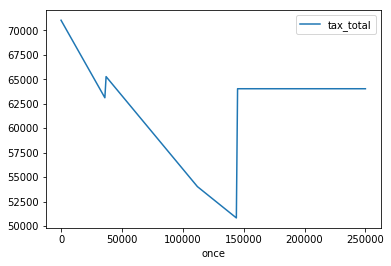

In [21]:
final.plot(x='once',y='tax_total')

In [22]:
final['tax_total'].min()

50826.704

In [23]:
final[final.tax_total == final['tax_total'].min()]

,once,tax_total
144,144000,50826.704


### 5.3 结论

1. 年终奖存在奖金黑洞。在临界点多发一块钱，会导致到手金额反而下降，应该尽量避免。
2. 新个税计算公式，全年总纳税金额与工资发放时间分布无关，仅与工资总额有关。
3. 按目前奖金发放情况，年终奖发放一次性奖金14400，剩余奖金算入工资发放，全年纳税额最小。可相比一次性全部发放节省13200税费